In [53]:
# Trying to fix the range doppler stuff in here

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift # Might not need this
from radar_ffts import range_doppler_fft, range_doppler_sum
from cfar import cfar, clean_cfar
from radar_functions import get_measurement_parameters, cfar_map, save_range_doppler_map, save_cfar_map, get_data_files
import os

c = 299792458 # metres per second - need this

In [54]:
session2_preface = '../4022S_data/session2/'
session3_preface = ['../4022S_data/session3/config1_rob/']

tennis_ball_tests = get_data_files(session2_preface) #just using this test
walking_away_test = h5py.File('../4022S_data/undergrad_testset/Experiment_moving_target_back_data.hdf5', 'r')
session3_rob_test = get_data_files(session3_preface[0])

freq_slope_const, number_of_samples_per_chirp, sample_rate, Tdata, bandwidth, range_bin_size, velocity_resolution = get_measurement_parameters(walking_away_test)

frame_data = walking_away_test[f'Sensors/TI_Radar/Data/Frame_5/frame_data']
fftd_frame_data = range_doppler_fft(frame_data, 0, 0)

plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)

33.33


In [59]:
def make_map(plotted_fftd_frame_data, range_bin_size, velocity_resolution):

    num_doppler_bins, num_range_bins = plotted_fftd_frame_data.shape

    maximum_range = num_range_bins * range_bin_size
    maximum_velocity = num_doppler_bins * velocity_resolution / 2

    plt.figure()
    plt.imshow(plotted_fftd_frame_data, aspect='auto', cmap='jet', extent=[0, maximum_range,-maximum_velocity, maximum_velocity])
    plt.title('Range-Doppler Map')
    plt.xlabel('Range')
    plt.ylabel('Doppler')
    plt.colorbar(label='Power (dB)')
    # Get current y-ticks and labels
    #x_ticks = plt.gca().get_xticks()
    #plt.gca().set_xticklabels(np.round(x_ticks[::1]*range_bin_size,3)) #TODO: Figure out how to relabel the data, not just the ticks
    #y_ticks = plt.gca().get_yticks()
    #plt.gca().set_yticklabels(np.round(y_ticks[::1]*velocity_resolution - velocity_resolution * num_doppler_bins * 0.5,3))


    plt.show()


def make_map_new(plotted_fftd_frame_data, range_bin_size, velocity_resolution):
    num_doppler_bins, num_range_bins = plotted_fftd_frame_data.shape

    fig, ax = plt.subplots()
    ax.imshow(plotted_fftd_frame_data, aspect='auto', cmap='jet')

    plt.show()


def range_doppler_map(hdf5_file_path, frame, make_map_check): # This started as a clone from radar_functions
    
    """Generates a range doppler map of hdf5 radar data. Can generate a plot (make_map = 1) or just the data (make_map = 0)
        -> make_map = 1 plots the heatmap, heat_map = 0 skips it
        -> save_map = 1 saves the map as a png, save_map = 0 skips it"""
    
    frame_data = hdf5_file_path[f'Sensors/TI_Radar/Data/Frame_{frame}/frame_data']
    range_pad = 0
    doppler_pad = 0

    _, _, _, _, _, range_bin_size, velocity_resolution = get_measurement_parameters(hdf5_file_path)

    fftd_frame_data = range_doppler_fft(frame_data, range_pad, doppler_pad)
    plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)
    plotted_fftd_frame_data=np.flip(plotted_fftd_frame_data, 0)

    if make_map_check:
        make_map(np.rot90(plotted_fftd_frame_data), range_bin_size, velocity_resolution)
        
    return plotted_fftd_frame_data

16.67


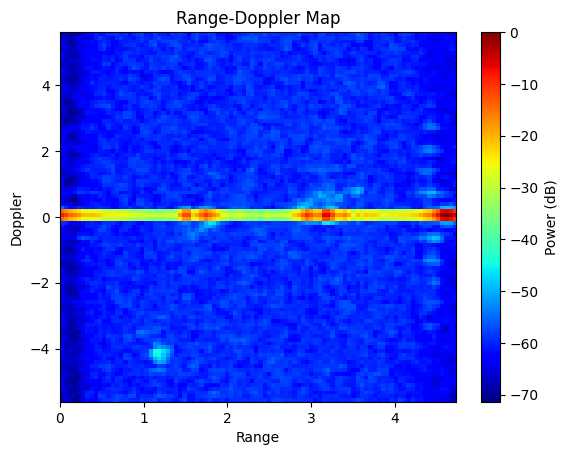

In [60]:
checking = range_doppler_map(session3_rob_test[0], 80, True)